In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv', encoding='utf-8', encoding_errors='replace')

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


## EDA

In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Null values

In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Duplicated values

In [7]:
df.duplicated().sum()

np.int64(5268)

## Preprocessing

### Handle duplicated values

In [8]:
df = df.drop_duplicates()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


### Handle Null values

In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

'Description' column

In [10]:
# Fill missing values with mode() (most frequently appear value)
df['Description'].fillna(df['Description'].mode()[0], inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_5940\3888960142.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Description'].fillna(df['Description'].mode()[0], inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_5940\3888960142.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Description'].fillna(df['Description'].mode()[0], inpla

'CustomerID' column

In [11]:
# Fill missing values with 0 (CustomerID are unique so cant fill it with mean())
df['CustomerID'] = df['CustomerID'].fillna(0)

C:\Users\pc\AppData\Local\Temp\ipykernel_5940\2305008754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID'] = df['CustomerID'].fillna(0)


In [12]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Feature Engineering

'InvoiceDate' column

In [13]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'] )

C:\Users\pc\AppData\Local\Temp\ipykernel_5940\1007404098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'] )


In [14]:
df['InvoiceDay'] = df['InvoiceDate'].dt.day
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceYear'] = df['InvoiceDate'].dt.year

C:\Users\pc\AppData\Local\Temp\ipykernel_5940\4122018315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDay'] = df['InvoiceDate'].dt.day
C:\Users\pc\AppData\Local\Temp\ipykernel_5940\4122018315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceMonth'] = df['InvoiceDate'].dt.month
C:\Users\pc\AppData\Local\Temp\ipykernel_5940\4122018315.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [15]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,InvoiceMonth,InvoiceYear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010


### Encoding

In [16]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(df[['Country']])

In [20]:
encoded_cols = list(encoder.get_feature_names_out())

In [ ]:
df[encoded_cols] = encoder.transform(df[['Country']])

In [24]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,InvoiceMonth,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Create training data

In [31]:
X = df.drop(columns={'InvoiceNo','StockCode','CustomerID','InvoiceDate', 'Description', 'Country','Country_Unspecified'}).copy()

In [32]:
X

,Quantity,UnitPrice,InvoiceDay,InvoiceMonth,InvoiceYear,Country_Australia,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,...,Country_Portugal,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom
0,6,2.55,1,12,2010,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,6,3.39,1,12,2010,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,8,2.75,1,12,2010,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,6,3.39,1,12,2010,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6,3.39,1,12,2010,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,12,0.85,9,12,2011,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541905,6,2.10,9,12,2011,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541906,4,4.15,9,12,2011,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541907,4,4.15,9,12,2011,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Quantity                      536641 non-null  int64  
 1   UnitPrice                     536641 non-null  float64
 2   InvoiceDay                    536641 non-null  int32  
 3   InvoiceMonth                  536641 non-null  int32  
 4   InvoiceYear                   536641 non-null  int32  
 5   Country_Australia             536641 non-null  float64
 6   Country_Austria               536641 non-null  float64
 7   Country_Bahrain               536641 non-null  float64
 8   Country_Belgium               536641 non-null  float64
 9   Country_Brazil                536641 non-null  float64
 10  Country_Canada                536641 non-null  float64
 11  Country_Channel Islands       536641 non-null  float64
 12  Country_Cyprus                536641 non-null  fl

## Build Model

In [28]:
from sklearn.cluster import KMeans

Training the model

In [29]:
model = KMeans(random_state=42, n_clusters=5)

In [34]:
model.fit(X)

KMeans(n_clusters=5, random_state=42)

In [36]:
model.cluster_centers_

array([[ 9.62092383e+00,  3.97496022e+00,  1.50247804e+01,
         7.54480482e+00,  2.01092178e+03,  2.34441682e-03,
         7.47306157e-04,  3.54085212e-05,  3.85580159e-03,
         5.96354040e-05,  2.81404563e-04,  1.41075003e-03,
         1.13866350e-03,  5.59081913e-05,  7.24942880e-04,
         1.52517546e-02,  1.13679989e-04,  1.29520643e-03,
         1.59114712e-02,  1.76669884e-02,  2.72086531e-04,
         5.29264211e-04,  3.39176361e-04,  5.47900275e-04,
         1.49647592e-03,  6.67171083e-04,  8.38622869e-05,
         6.52262232e-05,  2.36678010e-04,  4.41861072e-03,
         2.02387652e-03,  6.35489774e-04,  2.81404563e-03,
         1.08089170e-04,  1.86360638e-05,  4.23038647e-04,
         4.71119692e-03,  8.59122540e-04,  3.71603111e-03,
         5.42309456e-04,  1.26725234e-04,  9.13647935e-01],
       [-7.76050000e+04,  1.56000000e+00,  1.35000000e+01,
         6.50000000e+00,  2.01100000e+03,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+

In [37]:
preds = model.predict(X)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [38]:
X.columns

Index(['Quantity', 'UnitPrice', 'InvoiceDay', 'InvoiceMonth', 'InvoiceYear',
       'Country_Australia', 'Country_Austria', 'Country_Bahrain',
       'Country_Belgium', 'Country_Brazil', 'Country_Canada',
       'Country_Channel Islands', 'Country_Cyprus', 'Country_Czech Republic',
       'Country_Denmark', 'Country_EIRE', 'Country_European Community',
       'Country_Finland', 'Country_France', 'Country_Germany',
       'Country_Greece', 'Country_Hong Kong', 'Country_Iceland',
       'Country_Israel', 'Country_Italy', 'Country_Japan', 'Country_Lebanon',
       'Country_Lithuania', 'Country_Malta', 'Country_Netherlands',
       'Country_Norway', 'Country_Poland', 'Country_Portugal', 'Country_RSA',
       'Country_Saudi Arabia', 'Country_Singapore', 'Country_Spain',
       'Country_Sweden', 'Country_Switzerland', 'Country_USA',
       'Country_United Arab Emirates', 'Country_United Kingdom'],
      dtype='object')

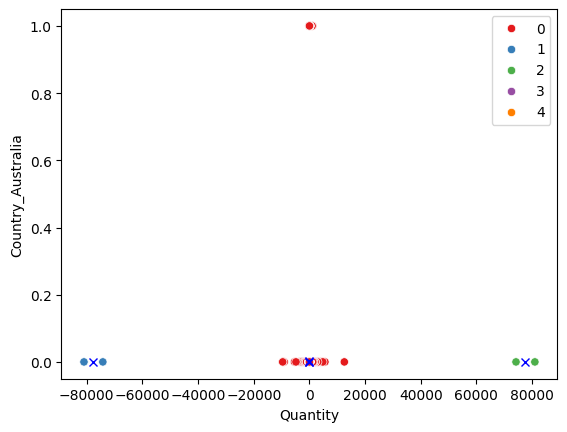

In [40]:
sns.scatterplot(data=X, x='Quantity', y='Country_Australia', hue=preds, palette='Set1');
centers_x, centers_y = model.cluster_centers_[:,0], model.cluster_centers_[:,5]
plt.plot(centers_x, centers_y, 'xb')